This notebook provides examples of how to load, examine, and visualize electrophysiological data containing known cell types. This data comes from the Cell Type Lookup Table dataset, which contains **extracallular electrophysiological** data with specific cell types identified via **optotagging**.

In [7]:
from hdmf_zarr import NWBZarrIO
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Unlike other Allen Institute datasets, we interact with these NWBs files directly. We will be using `hdmf_zarr` to interact with this dataset. See https://allenswdb.github.io/physiology/pyNWB/pyNWB.html for more details.

## Load an NWB

Let's try loading and exploring one session's worth of data.

In [2]:
# an 'arbitrarily' selected session
session = '661398_2023-04-03_15-47-29'
session_directory = f'/data/SWDB 2024 CTLUT data/ecephys_{session}_nwb'

nwb_file = os.path.join(session_directory, f'ecephys_{session}_experiment1_recording1.nwb.zarr')
io = NWBZarrIO(nwb_file, "r")
nwbfile_read = io.read()

You can use the **nwbwidgets** module to visually explore the contents of an nwb file.

In [3]:
from nwbwidgets import nwb2widget
nwb2widget(nwbfile_read)

## Load the units table

The units table contains all the "neurons" that were detected by the spike sorter (in this case, Kilosort 2.5). We usually refer to them as "units" because we can't actually be completely certain that the spike sorter output corresponds 1-to-1 to the actual neurons that were present at the time of the recording: this is just our best guess!

In [4]:
units = nwbfile_read.units[:]
units.head()

,spike_times,electrodes,waveform_mean,waveform_sd,unit_name,isolation_distance,amplitude_cutoff,half_width,peak_to_valley,rp_violations,...,internal_blue_train_mean_reliability,internal_blue_train_num_sig_pulses_paired,internal_blue_train_channel_diff,internal_red_train_best_site,internal_red_train_mean_latency,internal_red_train_mean_jitter,internal_red_train_mean_reliability,internal_red_train_num_sig_pulses_paired,internal_red_train_channel_diff,predicted_cell_type
id,,,,,,,,,,,,,,,,,,,,,
0,"[9006.844129514417, 9013.14751606443, 9043.911...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.1918797343969345, 1.4648407697677612, 0.2...","[[22.32207679748535, 26.04518699645996, 22.340...",23d7b73b-f977-461e-b350-caf83d6b0c95,40.884957,0.001845,0.000080,0.000507,1.0,...,0.036,0.0,9.0,1.0,NaN,NaN,0.004,0.0,9.0,untagged
1,"[8386.15841849922, 8457.686130241162, 8601.991...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-1.6333192586898804, -1.2682808637619019, -2...","[[27.633277893066406, 23.56047248840332, 28.42...",266b4cb8-72a3-43e3-87b8-aa522d625464,15.990079,0.000609,0.000287,0.000680,36.0,...,0.816,5.0,8.0,1.0,0.011400,NaN,0.020,0.0,8.0,D1
2,"[8527.649040817183, 8531.286060180604, 8665.88...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0, -1.2869995832443237...","[[0.0, 0.0, 0.0, 0.0, 0.0, 23.95038604736328, ...",f5fc0ac8-ec3d-459a-ac6a-c100afa9f852,25.064193,0.000172,0.000290,0.000547,35.0,...,0.496,5.0,5.0,2.0,0.011308,0.005346,0.036,0.0,5.0,D1
3,"[8432.19470044766, 8521.06923418915, 8609.4641...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.02808038517832756, 1.1232013702392578, -0...","[[22.959667205810547, 20.776987075805664, 23.7...",c2b81b63-8901-4959-a131-06924000928c,25.775067,0.003131,0.000240,0.000610,51.0,...,0.428,5.0,14.0,1.0,NaN,NaN,0.004,0.0,4.0,D1
4,"[8995.557343456132, 8995.561010467392, 8995.56...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.3416401147842407, 0.37440025806427, -0.664...","[[18.627443313598633, 17.53695297241211, 17.35...",b4db5621-767e-428d-b68b-1fffa0a4f21c,46.846559,0.001185,0.000230,0.000740,0.0,...,0.072,1.0,3.0,1.0,0.010600,NaN,0.012,0.0,3.0,untagged


In [5]:
units.columns

Index(['spike_times', 'electrodes', 'waveform_mean', 'waveform_sd',
       'unit_name', 'isolation_distance', 'amplitude_cutoff', 'half_width',
       'peak_to_valley', 'rp_violations', 'l_ratio', 'device_name',
       'drift_std', 'rp_contamination', 'snr', 'ks_unit_id', 'd_prime',
       'drift_mad', 'drift_ptp', 'default_qc', 'isi_violations_ratio',
       'peak_trough_ratio', 'firing_rate', 'recovery_slope',
       'repolarization_slope', 'amplitude', 'sliding_rp_violation',
       'presence_ratio', 'num_spikes', 'noise_label', 'peak_channel',
       'internal_blue_train_best_site', 'internal_blue_train_mean_latency',
       'internal_blue_train_mean_jitter',
       'internal_blue_train_mean_reliability',
       'internal_blue_train_num_sig_pulses_paired',
       'internal_blue_train_channel_diff', 'internal_red_train_best_site',
       'internal_red_train_mean_latency', 'internal_red_train_mean_jitter',
       'internal_red_train_mean_reliability',
       'internal_red_train_num_s

You may notice this units table has a lot of columns! Many of these are quality metrics or laser response metrics, which are more fully explained in the databook. You can use these to filter out units that are unlikely to be real neurons or units whose data is too noisy for analysis. Among the most interesting columns is the **spike_times** column, which tells us every time point when this "neuron" fired an "action potential."

Let's try plotting all the units in a raster plot,

Text(0, 0.5, 'Unit ID')

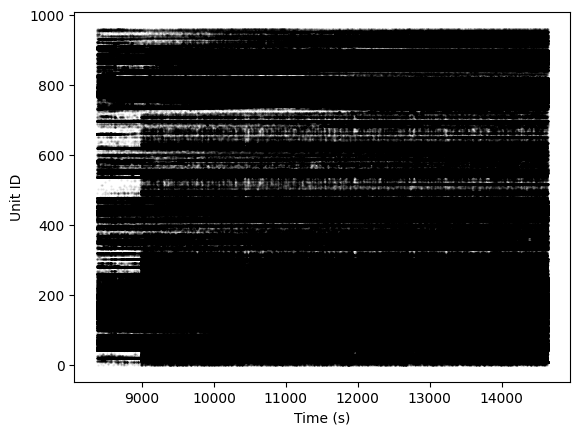

In [25]:
for unit_id, unit_row in units.iterrows():
    unit_spiketimes = unit_row.spike_times
    plt.plot(unit_spiketimes, np.tile(unit_id, len(unit_spiketimes)), 'k.', ms=1, alpha=0.1)
    
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')

Let's add information about the experiment epochs to that plot

In [26]:
epochs = nwbfile_read.epochs[:]
epochs

,start_time,stop_time,tags
id,,,
0,8374.287345,8985.404967,[pre-stimulus]
1,8985.404967,14631.343367,[stimulus]
2,14631.343367,14643.429888,[post-stimulus]


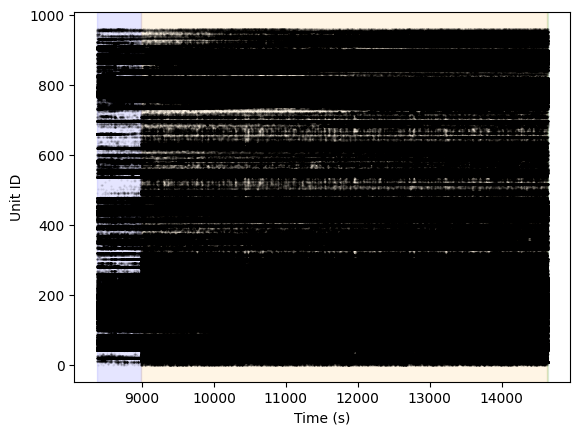

In [27]:
for unit_id, unit_row in units.iterrows():
    unit_spiketimes = unit_row.spike_times
    plt.plot(unit_spiketimes, np.tile(unit_id, len(unit_spiketimes)), 'k.', ms=1, alpha=0.1)
    
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')

colors = ['blue','orange','green']
epochs = nwbfile_read.epochs[:]
for index, row in epochs.iterrows():
    plt.axvspan(xmin=row.start_time, xmax=row.stop_time, color=colors[index], alpha=0.1)


Let's look just at the activity prior to the laser stimulation!

Text(0, 0.5, 'Unit ID')

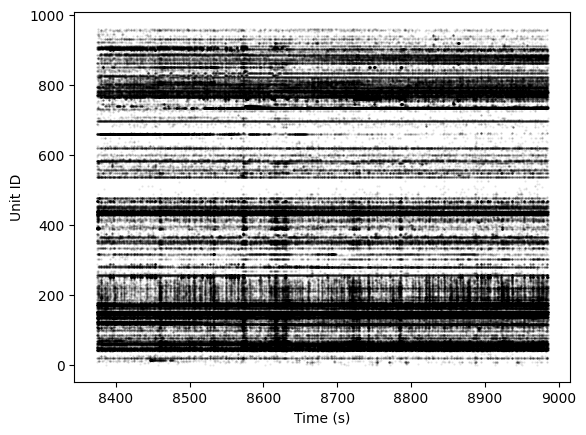

In [28]:
start_time = nwbfile_read.epochs.start_time[0]
stop_time = nwbfile_read.epochs.stop_time[0]

for unit_id, unit_row in units.iterrows():
    unit_spiketimes = unit_row.spike_times
    pre_stim_spiketimes = unit_spiketimes[unit_spiketimes<stop_time]
    plt.plot(pre_stim_spiketimes, np.tile(unit_id, len(pre_stim_spiketimes)), 'k.', ms=1, alpha=0.1)
    
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')

However, a lot of these "neurons" are probably noise or artifacts. We can use some of the quality metrics contained in the units table to filter out some of the "bad" "neurons." A common way to curate units is by the amount of ISI (interspike interval) violations. Neurons physiologically can not spike more often than every 2 ms, so a high ratio of "spikes" that happen less than 2 ms apart is a good indicator that this unit is not a real neuron (or, at least, not a *single* neuron).

Another way units are curated is by visually inspecting the spike waveforms to determine if they look like action potentials or just electrical noise. This table contains the results on someone's manual curation of the waveforms in the column *noise_label*.

Text(0, 0.5, 'Unit ID')

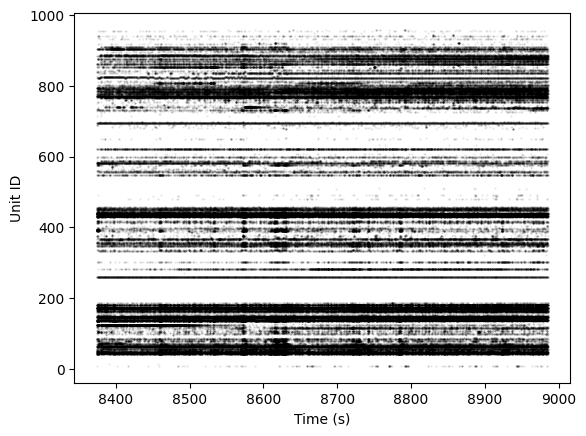

In [7]:
# query the units table to get units with good waveforms and low ISI violations!
good_units = units.query("isi_violations_ratio < 0.5 and noise_label == 'good'")

# and now plot only the "good" units
for unit_id, unit_row in good_units.iterrows():
    unit_spiketimes = unit_row.spike_times
    pre_stim_spiketimes = unit_spiketimes[unit_spiketimes<stop_time]
    plt.plot(pre_stim_spiketimes, np.tile(unit_id, len(pre_stim_spiketimes)), 'k.', ms=1, alpha=0.1)
    
plt.xlabel('Time (s)')
plt.ylabel('Unit ID')

***Exercise 1***: The most common standard QC criteria used at the Allen Institute are isi_violations_ratio < 0.5, amplitude_cutoff < 0.1, and presense_ratio > 0.8. Try querying for all three of these criteria and plotting the resulting *really* good units! How many units meet these criteria?

Many of these nwb files also contain units from multiple probes concatenated together. Let's see how many probes were used in this recording.

In [29]:
probes = np.unique(units.device_name)
probes

array(['ProbeA', 'ProbeB'], dtype=object)

It might be more useful to have separate plots for the two probes.

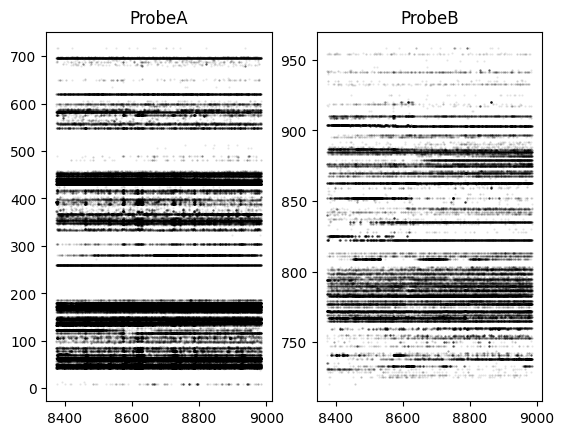

In [9]:
for ind_probe, probe in enumerate(probes):
    plt.subplot(1,2,ind_probe+1)
    this_probe_units = good_units.query("device_name == @probe")
    
    for unit_id, unit_row in this_probe_units.iterrows():
        unit_spiketimes = unit_row.spike_times
        pre_stim_spiketimes = unit_spiketimes[unit_spiketimes<stop_time]
        plt.plot(pre_stim_spiketimes, np.tile(unit_id, len(pre_stim_spiketimes)), 'k.', ms=1, alpha=0.1)
        plt.title(probe)

***Exercise 2***: The `peak_channel` column contains the electrode on the probe that is closest to the unit, as determined by the peak waveform. This gives us a location for the unit. Plot the above rasters with `peak_channel` as the y-axis rather than `unit_id`, which is assigned somewhat arbitrarily!

## Identify tagged units

During this experiment, known cell types were identified by their responses to pulses of laser. You can learn more about this technique in the databook (https://allenswdb.github.io/background/Optotagging.html)! The units table contains laser response metrics for every units, as well as a `predicted_cell_type` label. Let's try filtering the units table by `predicted_cell_type`!

In [30]:
np.unique(units.predicted_cell_type)

array(['D1', 'D2', 'untagged'], dtype=object)

This experiment was tagging D1 and D2 medium spiny neurons in the striatum! We can filter the units table for units for which we have a predicted cell type. Note that just because a unit is labeled as "untagged," that does not guarantee it *isn't* a D1 or D2 cell. We just don't know what it is.

In [31]:
tagged_units = units.query("predicted_cell_type != 'untagged'")
tagged_units.head()

,spike_times,electrodes,waveform_mean,waveform_sd,unit_name,isolation_distance,amplitude_cutoff,half_width,peak_to_valley,rp_violations,...,internal_blue_train_mean_reliability,internal_blue_train_num_sig_pulses_paired,internal_blue_train_channel_diff,internal_red_train_best_site,internal_red_train_mean_latency,internal_red_train_mean_jitter,internal_red_train_mean_reliability,internal_red_train_num_sig_pulses_paired,internal_red_train_channel_diff,predicted_cell_type
id,,,,,,,,,,,,,,,,,,,,,
1,"[8386.15841849922, 8457.686130241162, 8601.991...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-1.6333192586898804, -1.2682808637619019, -2...","[[27.633277893066406, 23.56047248840332, 28.42...",266b4cb8-72a3-43e3-87b8-aa522d625464,15.990079,0.000609,0.000287,0.000680,36.0,...,0.816,5.0,8.0,1.0,0.011400,NaN,0.020,0.0,8.0,D1
2,"[8527.649040817183, 8531.286060180604, 8665.88...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0, -1.2869995832443237...","[[0.0, 0.0, 0.0, 0.0, 0.0, 23.95038604736328, ...",f5fc0ac8-ec3d-459a-ac6a-c100afa9f852,25.064193,0.000172,0.000290,0.000547,35.0,...,0.496,5.0,5.0,2.0,0.011308,0.005346,0.036,0.0,5.0,D1
3,"[8432.19470044766, 8521.06923418915, 8609.4641...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.02808038517832756, 1.1232013702392578, -0...","[[22.959667205810547, 20.776987075805664, 23.7...",c2b81b63-8901-4959-a131-06924000928c,25.775067,0.003131,0.000240,0.000610,51.0,...,0.428,5.0,14.0,1.0,NaN,NaN,0.004,0.0,4.0,D1
5,"[8482.206435405316, 8753.257947229105, 8792.83...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[-0.7534801363945007, 0.7862401008605957, 0.4...","[[17.33216094970703, 17.445659637451172, 18.13...",3c3ccd15-75c2-4ecf-a997-7a42a816aecc,34.526303,0.000560,0.000260,0.000687,53.0,...,0.324,5.0,1.0,1.0,0.006600,0.003395,0.276,4.0,1.0,D2
6,"[8753.255547003684, 8995.197595251298, 9020.15...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",5e784c54-ae0d-4831-af89-47bf2d9140a4,34.463071,NaN,0.000273,0.000537,5.0,...,0.176,5.0,5.0,3.0,NaN,NaN,0.004,0.0,5.0,D1


Let's see what the activity of just these units looks like. Instead of plotting a raster, let's plot the firing rate by binning spikes together

Text(0, 0.5, 'Firing rate (spikes/s)')

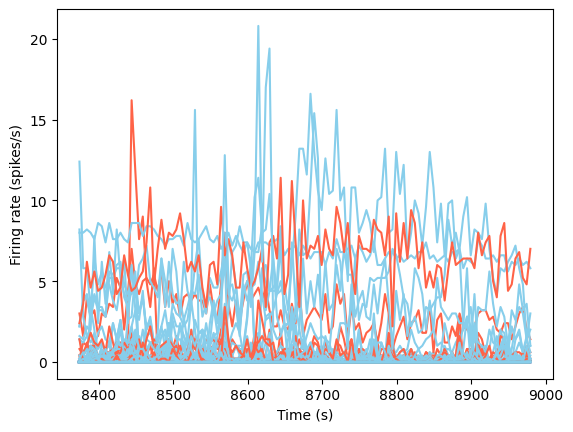

In [32]:
cell_type_colors = {'D1' : 'skyblue', 'D2' : 'tomato'}

for ind, (unit_id, unit_row) in enumerate(tagged_units.iterrows()):
    unit_spiketimes = unit_row.spike_times
    pre_stim_spiketimes = unit_spiketimes[unit_spiketimes<stop_time]

    #binning
    bin_length = 5
    time_bins = np.arange(np.floor(start_time),np.ceil(stop_time),bin_length)
    h,v = np.histogram(unit_spiketimes, time_bins)
    plt.plot(v[:-1],h/bin_length, color=cell_type_colors[unit_row.predicted_cell_type])
    
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (spikes/s)')

***Exercise 3***: Cell type predictions are based only on the unit's laser reponses, not the quality of the unit. There's a good chance many of these are laser artifacts or other types of noise or multiunit activity. Try further filtering the units table for tagged, *quality* units.

***Exercise 4***: Do these two cell types have different mean firing rates?

## Load running speed

Some behavioral data was collected during this experiment in addition to the physiology. For instance, the mouse was on a running wheel with an encoder, and so we recorded the mouse's running speed for the entire experiment. Let's try loading that data!

In [34]:
running = nwbfile_read.processing['behavior']['BehavioralTimeSeries']['linear velocity']
running_speed = np.array(running.data)
running_timestamps = np.array(running.timestamps)

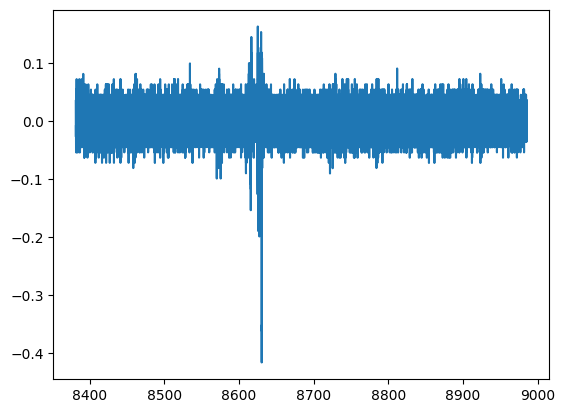

In [35]:
# plot the running speed for the same time period as the rasters above
pre_stim_timestamps = running_timestamps[running_timestamps < stop_time]
pre_stim_speed = running_speed[running_timestamps < stop_time]

plt.plot(pre_stim_timestamps, pre_stim_speed)

***Exercise 5***: Try plotting the running speed and the units raster in the same figure with a shared x-axis. Does any of the neuronal activity seem related to the mouse's movement? Is one cell type related to running more than the other?